# **Best Pittsburgh neighborhood is to move into for new people**


#### It does this by comparing household income to household debt and how often crimes occur in the area

Group Members: Alex Lampe, Scott Styslinger

Imports

In [1]:
import pandas as pd
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
import geopandas

### Metric 1: Crime (Alex L)

Data from: https://data.wprdc.org/dataset/uniform-crime-reporting-data

Crime is an important metric for us because new people most likely don't like crime. When moving into an area, crime is a factor you must consider. Being a victim of crime is no fun. The general theme of the metric will be specifying more until we see a decided winner. The first part of the analysis will be to measure the number of crimes total. Then we will measure the number of crimes per neighborhood. And then calculate the a crime score by adding the severity of crime cumulatively. Then the data will be mapped with the lightest shades of red neighborhoods the best in terms of the crime score calculated. Lastly the data will be calculated factoring in population. This is to consider areas that have high amounts of crime, but also high populations. Therefore these neighborhoods are at a disadvantage simply due to their size. Then the best 10 with lowest crime per capita will recieve points based on the place they recieved with 1st place getting 10 points, 2nd place getting 9 points, and so on and so forth until 10th place gets 1 point.

In [3]:
crime = pd.read_csv('data/crime.csv', low_memory=False)
pop = pd.read_csv('data/total-population.csv', low_memory=False)
neighborhoods = geopandas.read_file("data/Neighborhoods/Neighborhoods_.shp")


Importing and loading necessary packages and files.

In [4]:
len(crime)

276271

Showing the representation of the total number of crimes committed in Pittsburgh

In [5]:
crime['INCIDENTNEIGHBORHOOD'].value_counts().sort_values(ascending=True)

Mt. Oliver Boro                40
Ridgemont                      69
Outside County                 83
St. Clair                      89
East Carnegie                 109
                             ... 
Brookline                    2614
East Liberty                 2752
Carrick                      3636
South Side Flats             4904
Central Business District    6808
Name: INCIDENTNEIGHBORHOOD, Length: 94, dtype: int64

Showing the representation of the total number of crimes per neighborhood sorted ascending

In [6]:
total_crime_df = crime.groupby(['INCIDENTNEIGHBORHOOD'])['HIERARCHY'].sum().to_frame()
total_crime_df.sort_values(by='HIERARCHY', ascending=True) #Sort by hierarchy

,HIERARCHY
INCIDENTNEIGHBORHOOD,
Mt. Oliver Boro,1766.0
Ridgemont,3843.0
St. Clair,4547.0
New Homestead,4555.0
Regent Square,4983.0
...,...
Mount Washington,117671.0
Brookline,123946.0
Carrick,154705.0


Show the hierarchy of the crimes, which is the code assigned to each crime. 99 is NA and 1 is murder. 

In [7]:
crime["HIERARCHY"] = crime["HIERARCHY"].apply(lambda x: abs(100-x)) # Swap the scores so lower is now higher


We're gonna need to swap these numbers so that murder is 99 and NA is 1.

In [8]:
total_crime_df["NEW HIERARCHY"] = crime.groupby(['INCIDENTNEIGHBORHOOD'])['HIERARCHY'].sum().to_frame()
total_crime_df.sort_values(by='NEW HIERARCHY', ascending=True)

,HIERARCHY,NEW HIERARCHY
INCIDENTNEIGHBORHOOD,,
Mt. Oliver Boro,1766.0,2234.0
Outside County,5915.0,2385.0
Ridgemont,3843.0,3057.0
Outside State,8254.0,3346.0
St. Clair,4547.0,4353.0
...,...,...
Shadyside,104563.0,141037.0
East Liberty,107576.0,167624.0
Carrick,154705.0,208895.0


This is the fixed values that properly reflect severity of crime.

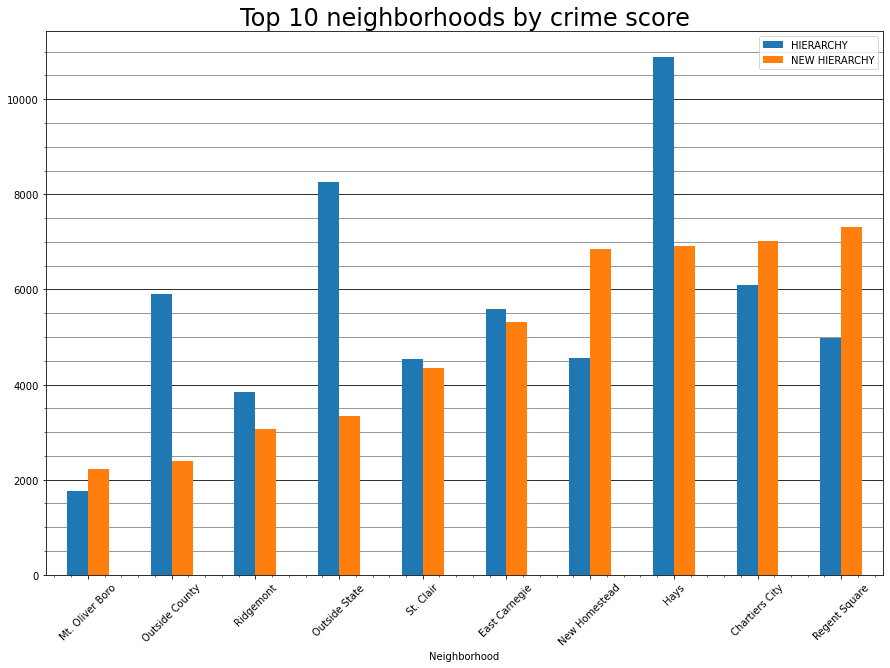

In [9]:
ax1 = total_crime_df.nsmallest(10, columns="NEW HIERARCHY").sort_values(by='NEW HIERARCHY', ascending=True).plot(kind="bar", figsize=(15,10))
ax1.set_xlabel("Neighborhood")
ax1.set_axisbelow(True)
ax1.yaxis.grid(True, color ="black")
ax1.yaxis.grid(True, 'minor', color ="grey")
plt.minorticks_on()
plt.title('Top 10 neighborhoods by crime score', fontdict = {'fontsize': 24})
plt.xticks(rotation=45)
plt.show()

Here is a graph of the top 10 neighborhoods by the crime score we calculated earlier. The reasoning is that murder is a severe crime and should be counted as more crime than NA which is pretty much when no crime occurs and should not really affect crime levels in a certain neighborhood. The blue is the old data and the orange is the processed data

In [10]:
crime_map = neighborhoods.merge(total_crime_df, how='left', left_on='hood', right_on='INCIDENTNEIGHBORHOOD')

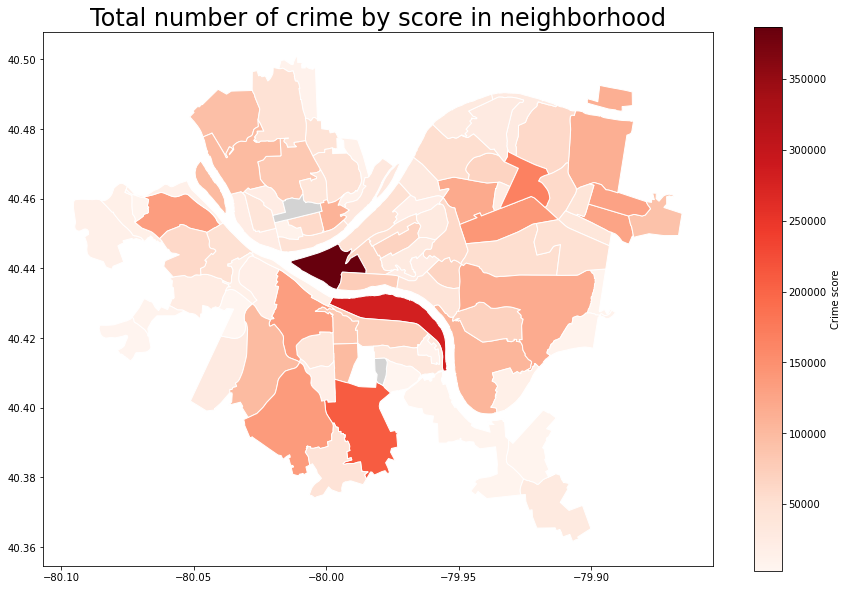

In [11]:
fig2, ax2 = plt.subplots(figsize=(15, 10))
crime_map.plot(column='NEW HIERARCHY',
                cmap='Reds',
                edgecolor="white",
                legend=True, 
                legend_kwds={'label': "Crime score"},
                figsize=(15, 10),
                missing_kwds={"color": "lightgrey"},
                ax=ax2
               )
plt.title('Total number of crime by score in neighborhood', fontdict = {'fontsize': 24})
plt.show()


Here is a map of the neighborhoods where darkest red has the largest modified crime score.

In [12]:
pop_df = pop.groupby(['Neighborhood'])['Estimate; Total'].sum().to_frame()
pop_df.sort_values(by='Estimate; Total', ascending=True)


,Estimate; Total
Neighborhood,
Chateau,3.0
South Shore,12.0
North Shore,205.0
West End,235.0
St. Clair,270.0
...,...
Carrick,10122.0
Squirrel Hill North,11336.0
Brookline,13160.0


Considering that large cities are sure to have more crime due to statistics, I thought it would be fair to include population so I could calculate modified crime score per capita

In [13]:
total_crime_df["POPULATION"] = pop_df['Estimate; Total']
total_crime_df["POPULATION"] = total_crime_df["POPULATION"].fillna(50)
total_crime_df.sort_values(by='POPULATION', ascending=True)

,HIERARCHY,NEW HIERARCHY,POPULATION
INCIDENTNEIGHBORHOOD,,,
Chateau,75501.0,22599.0,3.0
South Shore,21995.0,15705.0,12.0
Outside State,8254.0,3346.0,50.0
Outside City,36929.0,11771.0,50.0
Mt. Oliver Boro,1766.0,2234.0,50.0
...,...,...,...
Carrick,154705.0,208895.0,10122.0
Squirrel Hill North,56570.0,53430.0,11336.0
Brookline,123946.0,137454.0,13160.0


In [14]:
total_crime_df["NEW HIERARCHY / POPULATION"] = total_crime_df["NEW HIERARCHY"] / total_crime_df["POPULATION"]
total_crime_df.sort_values(by='NEW HIERARCHY / POPULATION', ascending=True)

,HIERARCHY,NEW HIERARCHY,POPULATION,NEW HIERARCHY / POPULATION
INCIDENTNEIGHBORHOOD,,,,
Squirrel Hill North,56570.0,53430.0,11336.0,4.713303
Stanton Heights,26371.0,28429.0,4761.0,5.971225
North Oakland,57037.0,58863.0,9602.0,6.130285
Swisshelm Park,6808.0,8792.0,1345.0,6.536803
New Homestead,4555.0,6845.0,973.0,7.034943
...,...,...,...,...
North Shore,37746.0,47554.0,205.0,231.970732
Outside City,36929.0,11771.0,50.0,235.420000
Central North Side,45926.0,63574.0,50.0,1271.480000


Get the population of the people so that we can get crime score per capita instead of total crime score

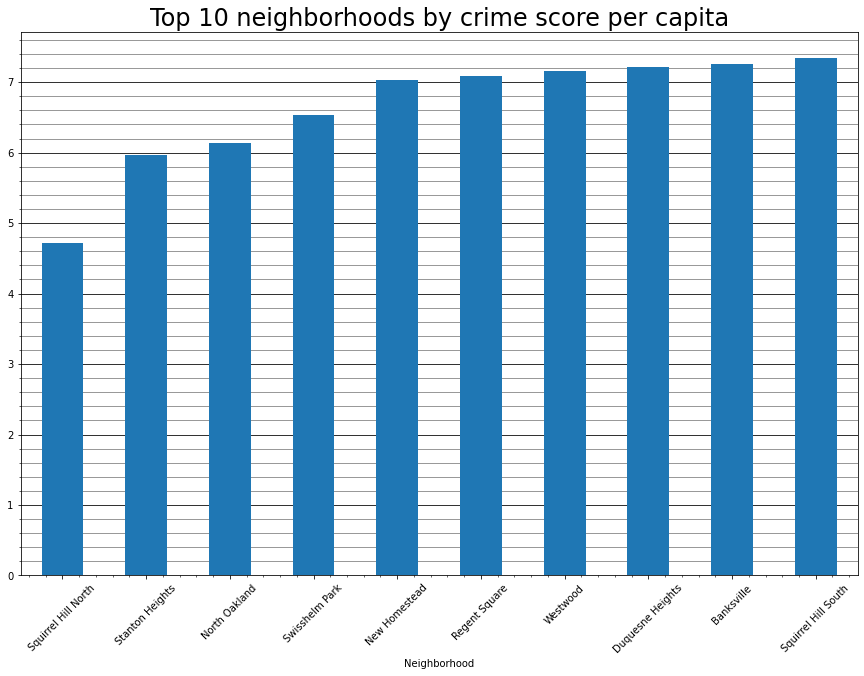

In [15]:
ax3 = total_crime_df["NEW HIERARCHY / POPULATION"].nsmallest(10).plot(kind="bar", figsize=(15,10))
ax3.set_xlabel("Neighborhood")
ax3.set_axisbelow(True)
ax3.yaxis.grid(True, color ="black")
ax3.yaxis.grid(True, 'minor', color ="grey")
plt.minorticks_on()
plt.title('Top 10 neighborhoods by crime score per capita', fontdict = {'fontsize': 24})
plt.xticks(rotation=45)
plt.show()

In [16]:
total_crime_df["log(NEW HIERARCHY / POPULATION)"] = np.log(total_crime_df["NEW HIERARCHY / POPULATION"])
total_crime_df.sort_values(by='log(NEW HIERARCHY / POPULATION)', ascending=True)

,HIERARCHY,NEW HIERARCHY,POPULATION,NEW HIERARCHY / POPULATION,log(NEW HIERARCHY / POPULATION)
INCIDENTNEIGHBORHOOD,,,,,
Squirrel Hill North,56570.0,53430.0,11336.0,4.713303,1.550389
Stanton Heights,26371.0,28429.0,4761.0,5.971225,1.786952
North Oakland,57037.0,58863.0,9602.0,6.130285,1.813241
Swisshelm Park,6808.0,8792.0,1345.0,6.536803,1.877448
New Homestead,4555.0,6845.0,973.0,7.034943,1.950890
...,...,...,...,...,...
North Shore,37746.0,47554.0,205.0,231.970732,5.446611
Outside City,36929.0,11771.0,50.0,235.420000,5.461371
Central North Side,45926.0,63574.0,50.0,1271.480000,7.147937


Seeing as the crime per capita in Chateau is over 7000, the plot maps only reflected that Chateau was #1 and the other neighborhoods were all the same. That is why I'm adding a log column because then it will allow all neighborhoods to be accurately compared.

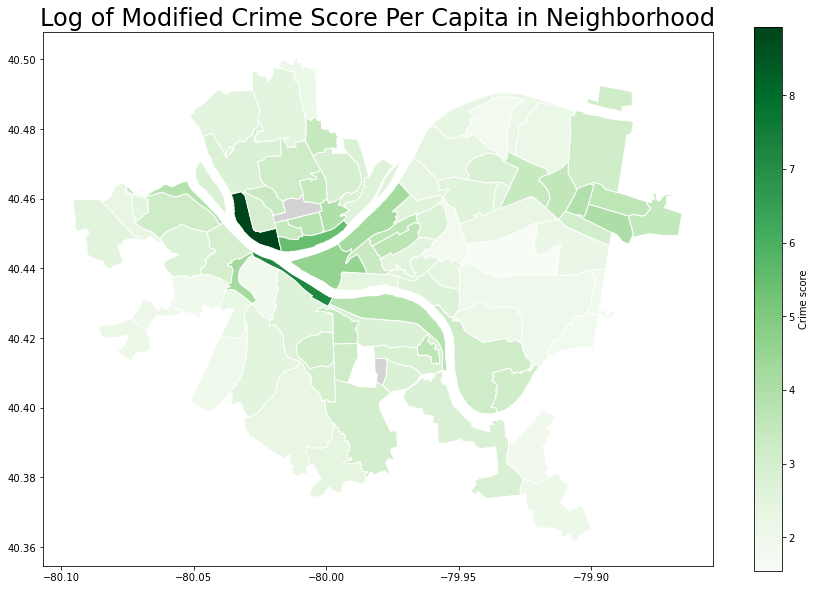

In [17]:
crime_map = neighborhoods.merge(total_crime_df, how='left', left_on='hood', right_on='INCIDENTNEIGHBORHOOD')
fig2, ax2 = plt.subplots(figsize=(15, 10))
crime_map.plot(column='log(NEW HIERARCHY / POPULATION)',
                cmap='Greens',
                edgecolor="white",
                legend=True, 
                legend_kwds={'label': "Crime score"},
                figsize=(15, 10),
                missing_kwds={"color": "lightgrey"},
                ax=ax2
               )
plt.title('Log of Modified Crime Score Per Capita in Neighborhood', fontdict = {'fontsize': 24})
plt.show()

Here is the map showing the log of the quotient of the modified crime score and total capita in neighborhood. The data shows a clear concentration of crime towards the center of Pittsburgh where the large spits and where the point is located. The safest neighborhoods are very far away from the middle. Therefore it is not surprising that many of the top winners were areas 20-30 minutes away from the center of downtown.

Conclusion: The best neighborhood is Squirrel Hill North because it has the least crime per capita.

### Metric 2: Debt (Alex L)

Data from: https://data.wprdc.org/dataset/pittsburgh-american-community-survey-2015-miscellaneous-data/resource/c93e8aca-7772-4775-bcd4-da10354cd1cc

For new homebuyers, debt is a serious concern. Just like we've seen in the 2008 financial recession, debt can cause a lot of problems. Therefore, for new homebuyers, it is imperative that their neighbors not be in debt. The analysis will begin by counting the total number of housing debts that are owed. Then we will plot the top 10 neighborhoods with no total debt. After which we will map the city with the darkest blue meaning the most housing debts. And we will conclude from these charts that there is a 4 way tie because there are 4 neighborhoods that have no housing debt whatsoever.

In [18]:
debt = pd.read_csv('data/debt.csv', low_memory=False)
debt_df = pd.DataFrame(debt)
neighborhoods2 = geopandas.read_file("data/Neighborhoods/Neighborhoods_.shp")

Importing and loading necessary packages and files.

In [19]:
total_mort_df = debt.groupby(['Neighborhood'])['Estimate; Total:'].sum()


In [20]:
total_mort_df.sort_values(ascending=True)

Neighborhood
South Shore               0.0
Arlington Heights         0.0
Glen Hazel                0.0
North Shore               0.0
Chateau                   3.0
                        ...  
Beechview              2065.0
Brighton Heights       2206.0
Carrick                2624.0
Squirrel Hill South    3152.0
Brookline              4245.0
Name: Estimate; Total:, Length: 91, dtype: float64

This data is the estimated total of mortgages, contracts to purchase, or similar debts per neighborhood

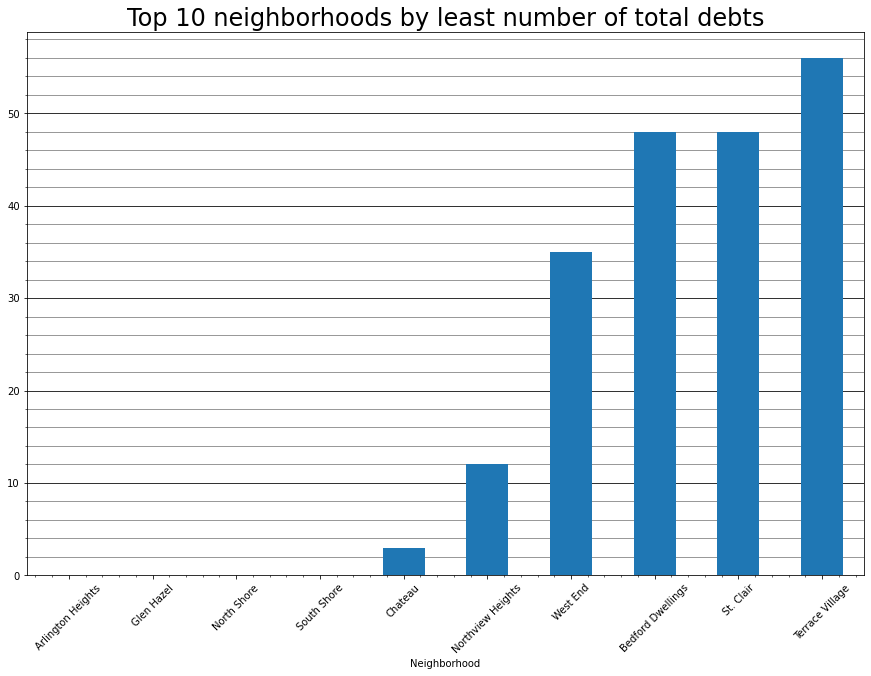

In [21]:
ax1 = total_mort_df.nsmallest(10).sort_values(ascending=True).plot(kind="bar", figsize=(15,10))
ax1.set_xlabel("Neighborhood")
ax1.set_axisbelow(True)
ax1.yaxis.grid(True, color ="black")
ax1.yaxis.grid(True, 'minor', color ="grey")
plt.minorticks_on()
plt.title('Top 10 neighborhoods by least number of total debts', fontdict = {'fontsize': 24})
plt.xticks(rotation=45)
plt.show()

Here is a bar chart showing the 10 neighborhoods with the lowest total amount of loans.

In [22]:
debt_map = neighborhoods.merge(total_mort_df, how='left', left_on='hood', right_on='Neighborhood')

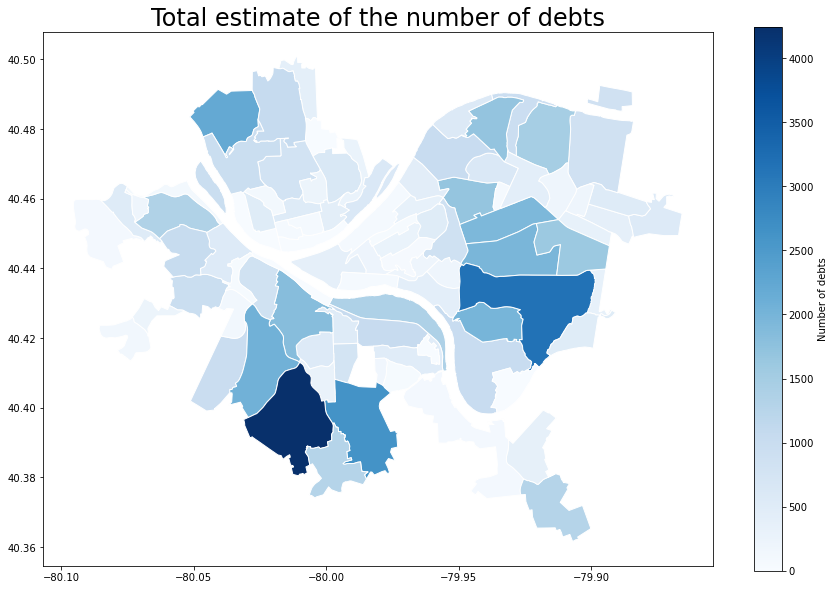

In [23]:
fig2, ax2 = plt.subplots(figsize=(15, 10))
debt_map.plot(column='Estimate; Total:',
                cmap='Blues',
                edgecolor="white",
                legend=True, 
                legend_kwds={'label': "Number of debts"},
                figsize=(15, 10),
                missing_kwds={"color": "lightgrey"},
                ax=ax2
               )
plt.title('Total estimate of the number of debts', fontdict = {'fontsize': 24})
plt.show()

Here is a map showcasing the number of total loans per neighborhood indicated by shade of blue.

Conclusion: The best neighborhoods with no debt are South Shore, Arlington Heights, Glen Hazel, and North Shore. These 4 will get 10 points while the remaining will get the regular point scheme of 5 points for 5th, 4 points for 6th, etc until 1 point for 10th.

### Metric 3: Average Income (Scott S)

Data from: https://data.wprdc.org/dataset/pittsburgh-american-community-survey-2015-miscellaneous-data/resource/34842307-0da6-458a-9df3-a09ab3e3a489

Income is a powerful metric for new homebuyers to ensure that they are able to afford the neighborhood they are living in. In addition, income can also foreshadow future events that a new homebuyer would want to know. In this examination of average income data, we will plot and map the top 10 places with the highest income. By showing this data visually and topographically, we will be able to show the top 10 possible neighborhoods by average income.

<AxesSubplot:>

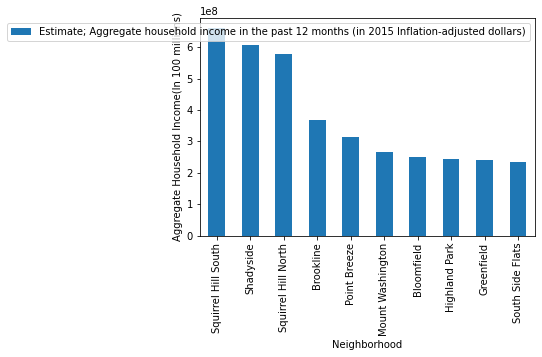

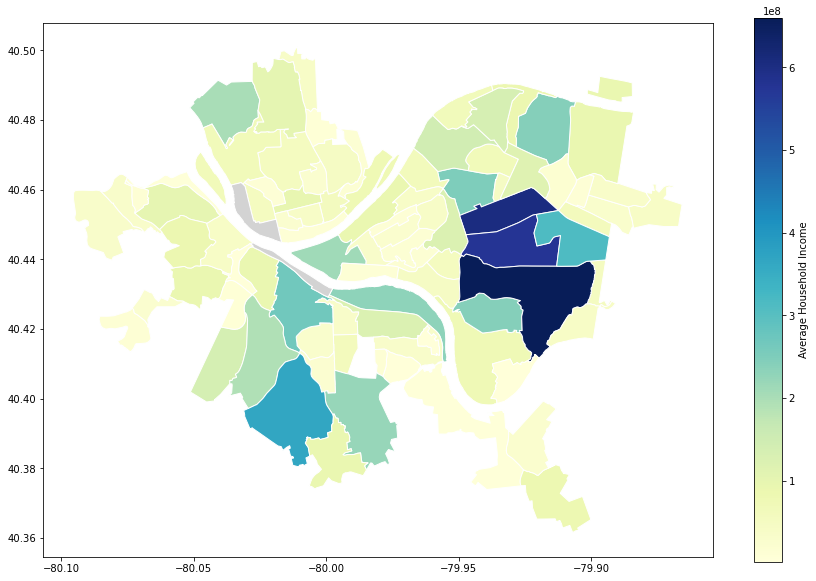

In [24]:
income = pd.read_csv("data/aggregatehouseholdincome.csv", index_col="Id") # use the column named _id as the row index

#print(income[income["Estimate; Aggregate household income in the past 12 months (in 2015 Inflation-adjusted dollars)"]=='-'])
#Drop broken numbers from income list
income["Estimate; Aggregate household income in the past 12 months (in 2015 Inflation-adjusted dollars)"] = pd.to_numeric(income["Estimate; Aggregate household income in the past 12 months (in 2015 Inflation-adjusted dollars)"], errors='coerce')
income = income.dropna(subset=["Estimate; Aggregate household income in the past 12 months (in 2015 Inflation-adjusted dollars)"])
income["Estimate; Aggregate household income in the past 12 months (in 2015 Inflation-adjusted dollars)"] = income["Estimate; Aggregate household income in the past 12 months (in 2015 Inflation-adjusted dollars)"].astype(int)

#Mapping the top 10 earners
income.nlargest(10, "Estimate; Aggregate household income in the past 12 months (in 2015 Inflation-adjusted dollars)").plot(kind='bar', x='Neighborhood', ylabel="Aggregate Household Income(In 100 millions)")

#ADDING THE MAP
neighborhoods = geopandas.read_file("data/Neighborhoods/Neighborhoods_.shp") # read in the shapefile
#neighborhoods.plot() # plot the geopandas dataframe

incomemap = neighborhoods.merge(income, how='left', left_on='hood', right_on="Neighborhood")
incomemap[['hood',"Estimate; Aggregate household income in the past 12 months (in 2015 Inflation-adjusted dollars)",'geometry']].head()

incomemap.plot(column="Estimate; Aggregate household income in the past 12 months (in 2015 Inflation-adjusted dollars)", cmap='YlGnBu', edgecolor='white', legend=True,
             legend_kwds={"label": "Average Household Income"}, figsize=(15, 10), missing_kwds={"color": "lightgrey"})

## **What can we conclude?**

* ### Squirrel Hill South is by far the richest neighborhood in Pittsburgh

* #### WatchMojo top 10 below

1. Squirrel Hill South
2. Shadyside
3. Squirrel Hill North
4. Brookline
5. Point Breeze
6. Mount Washington
7. Bloomfield
8. Highland Park
9. Greenfield
10. South Side Flats

### Final Metric:



**Average income points + crime score per capita points + least amount of debt points**

For our final metric we wanted to show that each of these metrics had equal importance and none was more important than the others. To assign the points, we simply assigned 10 points for 1st, 9 points for 2nd, etc, 1 point for 10th, with the additional bonus that if there is a tie, they will share the best place the neighborhoods tie for. We created this final metric in this way to show that the items are equal and ties did not detract from placement.

In [36]:
total_crime_df = total_crime_df.sort_values(by='NEW HIERARCHY / POPULATION', ascending=False)
for x in range(94):
    total_crime_df['Score'][x] = x
total_crime_df

C:\Users\lampe\AppData\Local\Temp\ipykernel_6264\893530104.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  total_crime_df['Score'][x] = x


,HIERARCHY,NEW HIERARCHY,POPULATION,NEW HIERARCHY / POPULATION,log(NEW HIERARCHY / POPULATION),Score
INCIDENTNEIGHBORHOOD,,,,,,
Chateau,75501.0,22599.0,3.0,7533.000000,8.927049,0
South Shore,21995.0,15705.0,12.0,1308.750000,7.176828,1
Central North Side,45926.0,63574.0,50.0,1271.480000,7.147937,2
Outside City,36929.0,11771.0,50.0,235.420000,5.461371,3
North Shore,37746.0,47554.0,205.0,231.970732,5.446611,4
...,...,...,...,...,...,...
New Homestead,4555.0,6845.0,973.0,7.034943,1.950890,89
Swisshelm Park,6808.0,8792.0,1345.0,6.536803,1.877448,90
North Oakland,57037.0,58863.0,9602.0,6.130285,1.813241,91


In [40]:
total_crime_df = total_crime_df.sort_values(by="INCIDENTNEIGHBORHOOD", ascending=True)
# For merging the data we need to make sure each dataframe is sorted by neighborhood. 
# This is so that rows don't get messed up between dataframes

Here are the scores for the crime metric

In [41]:
debt_score = total_mort_df.nsmallest(10).sort_values(ascending=True).to_frame()
debt_score.insert(1, "Score", [10, 10, 10, 10, 6, 5, 4, 3, 2, 1], True)

In [ ]:
debt_score

,Estimate; Total:,Score
Neighborhood,,
Arlington Heights,0.0,10
Glen Hazel,0.0,10
North Shore,0.0,10
South Shore,0.0,10
Chateau,3.0,6
Northview Heights,12.0,5
West End,35.0,4
Bedford Dwellings,48.0,3
St. Clair,48.0,2


Here are the scores for the debt metric

In [ ]:
income_score = income.nlargest(10, "Estimate; Aggregate household income in the past 12 months (in 2015 Inflation-adjusted dollars)").sort_values(by="Estimate; Aggregate household income in the past 12 months (in 2015 Inflation-adjusted dollars)",ascending=True)
income_score.insert(1, "Score", [10, 9, 8, 7, 6, 5, 4, 3, 2, 1], True)

In [ ]:
income_score.iloc[0:10, 0:2]

,Neighborhood,Score
Id,,
73,South Side Flats,10
37,Greenfield,9
40,Highland Park,8
10,Bloomfield,7
54,Mount Washington,6
64,Point Breeze,5
14,Brookline,4
77,Squirrel Hill North,3
69,Shadyside,2


Here are the scores for the income metric

In [ ]:
results = pd.read_csv('data/results.csv', low_memory=False)
result_df = results.groupby(['Neighborhood'])['Final Score'].sum()

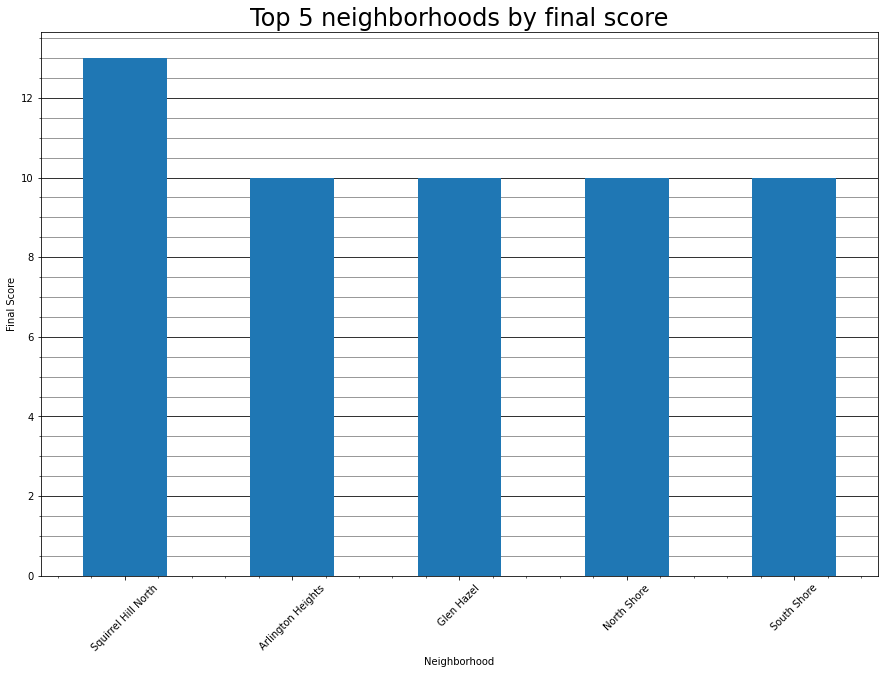

In [ ]:
ax5 = result_df.nlargest(5).plot(kind="bar", figsize=(15,10))
ax5.set_xlabel("Neighborhood")
ax5.set_ylabel("Final Score")
ax5.set_axisbelow(True)
ax5.yaxis.grid(True, color ="black")
ax5.yaxis.grid(True, 'minor', color ="grey")
plt.minorticks_on()
plt.title('Top 5 neighborhoods by final score', fontdict = {'fontsize': 24})
plt.xticks(rotation=45)
plt.show()

Here is a graph of the final top 5 neighborhoods

## The best neighborhood according to dumbasses is: **drum roll**

# **Squirrel Hill North**

Alex's conclusion: The data driven determination was heavyily impacted by the debt metric. Because we chose to split 1st place amongst the neighborhoods with no debt, 4 of them appeared in the top 5. The data was very widespread as well. There are relationships in the maps, but not so much in the final scores. The only time the data aligned was with Squirrel Hill North, the best neighborhood according to our criteria. It was the crime per capita #1 and the #8 best average income and was the only data that matched eachother besides Squirrel Hill South as well. One insight I can gather is that Squirrel Hill South must have similar data to Squirrel Hill North except that it must have more crime per capita.

In [ ]:
# income = pd.read_csv("aggregatehouseholdincome.csv", index_col="Id")
# income["Estimate; Aggregate household income in the past 12 months (in 2015 Inflation-adjusted dollars)"] = pd.to_numeric(income["Estimate; Aggregate household income in the past 12 months (in 2015 Inflation-adjusted dollars)"], errors='coerce')
# income = income.dropna(subset=["Estimate; Aggregate household income in the past 12 months (in 2015 Inflation-adjusted dollars)"])
# income["Estimate; Aggregate household income in the past 12 months (in 2015 Inflation-adjusted dollars)"] = income["Estimate; Aggregate household income in the past 12 months (in 2015 Inflation-adjusted dollars)"].astype(int)
# income.nlargest(10, "Estimate; Aggregate household income in the past 12 months (in 2015 Inflation-adjusted dollars)").plot(kind='bar', x='Neighborhood', ylabel="Aggregate Household Income(In 100 millions)")

# mone= "Estimate; Aggregate household income in the past 12 months (in 2015 Inflation-adjusted dollars)"
# mtwo= "Estimate; Housing units with a mortgage, contract to purchase, or similar debt: - With either a second mortgage or home equity loan, but not both:"
# #YO WE'RE MEASURING DEBT WITH HOUSEHOLDS THAT TOOK A SECOND MORTGAGE
# households= pd.read_csv("debt.csv", index_col="Id")
# households.nlargest(10, mtwo).plot(kind='bar', x='Neighborhood', y=mtwo)

# crime = pd.read_csv("crime.csv", low_memory=False)
# crime["HIERACRCHY"] = pd.to_numeric(crime["HIERARCHY"], errors='coerce')
# crime = crime.dropna(subset=["HIERARCHY"])

# higherdic = dict()

# for i, row in crime.iterrows():
#     if row['INCIDENTNEIGHBORHOOD'] not in higherdic:
#         higherdic[row['INCIDENTNEIGHBORHOOD']] = row['HIERARCHY']
#     else: higherdic[row['INCIDENTNEIGHBORHOOD']] += row['HIERARCHY']

# print(higherdic)
# hoods = pd.DataFrame.from_dict(higherdic, orient='index', columns=['Crime'])
# income.set_index('Neighborhood')
# full = income.join(hoods, on='Neighborhood')
# extract = households[mtwo]
# full = full.join(extract)
# full['score'] = (full[mone]/(full[mtwo]+full['Crime']))

# full.nlargest(10, 'score').plot(kind='bar', x='Neighborhood', y='score')

# #hoods = pd.merge(income, crime, left_on='Neighborhood', right_on='INCIDENTNEIGHBORHOOD')